In [1]:
import os

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
import missingno as msno

In [4]:
import sklearn as sk

In [74]:
from sklearn import datasets

In [75]:
iris = datasets.load_iris()

In [77]:
X = iris.data
y = iris.target

In [81]:
df = pd.DataFrame(X,columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [86]:
targets = pd.DataFrame(iris.target, columns = ['species'])

In [87]:
df= pd.concat([df,targets], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


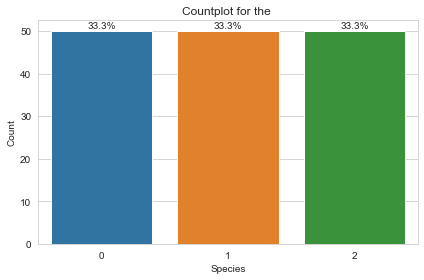

In [88]:
sns.set_style('whitegrid')
ax = sns.countplot(y)
plt.title('Countplot for the ')
plt.xlabel('Species')
plt.ylabel('Count')

total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%\n'
    i = p.get_x() + p.get_width() / 2
    j = p.get_height()
    ax.annotate(percentage, (i,j), ha='center',va='center')
plt.tight_layout()
plt.show()

<AxesSubplot:>

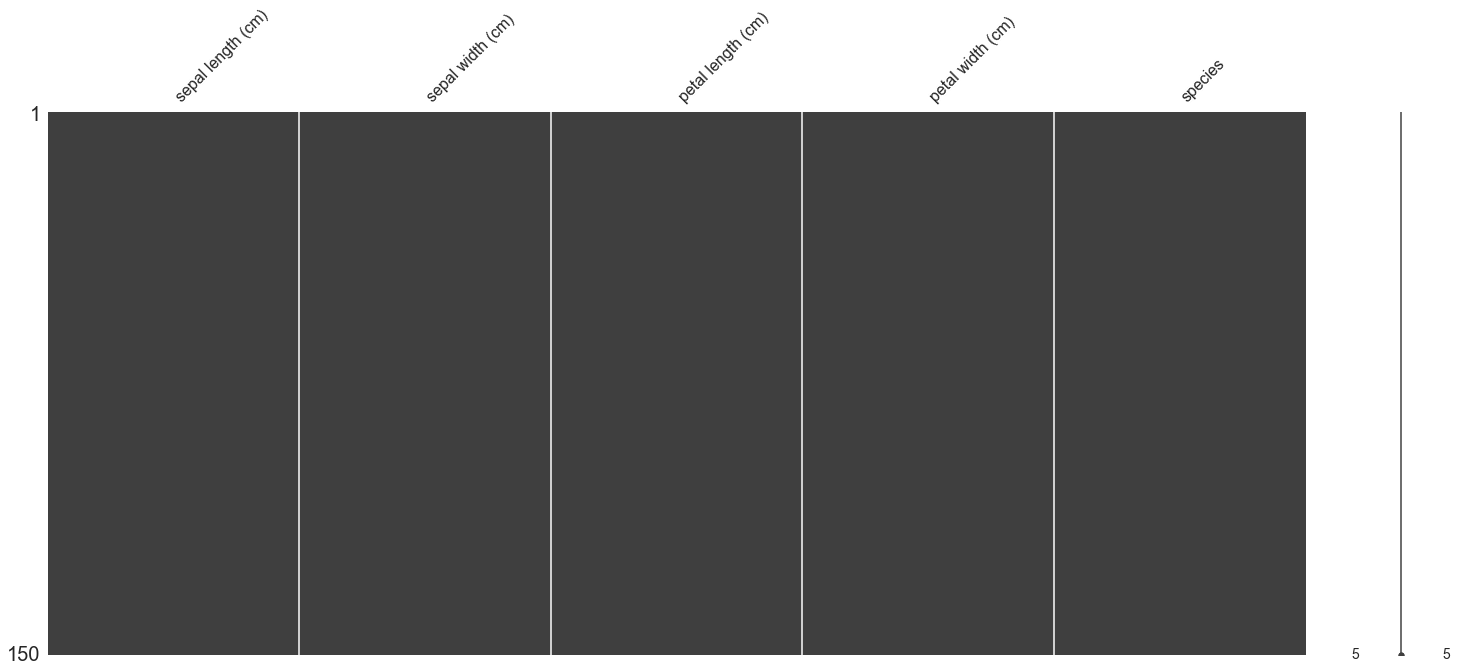

In [89]:
msno.matrix(df)

In [90]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Decision Trees

Decision Tree is one of the most popular supervised machine learning algorithmm that constructs a tree from top-down beginning with the question "which attribute should be tested at the root the tree"? The best attribute is selected and used as the test at the root node of the tree. A descendant of the root node is then created for each possible value of this attribute, and the training examples are sorted to the appropriate descendant node. The entire process is repeated using the training examples associated with descendant node to select the best attribute to test at that point in the tree.

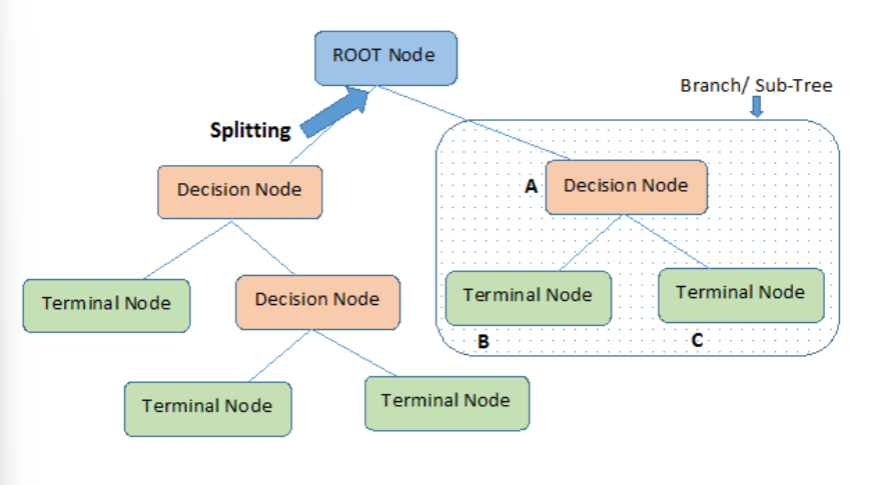

### How to find out which attribute is the best classifier?

A good quantitative measure of the worth of an attribute is the information gain. It measure how well a given attribute separates the training examples according to their target classification. 

But to understand Information Gain, we first need to know about Entropy, which is a measure commonly used in information theory. Entropy in general is defined as the randomness. It measures the impurity present in a collection of examples.

$$Entropy(S)\equiv -p_{\oplus}log_{2}p_{\oplus}-p_{\ominus}log_{2}p_{\ominus}$$

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [102]:
X = df.drop(['species'],axis=1)
y = df['species']

In [103]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [104]:
X_train.shape, X_test.shape

((105, 4), (45, 4))

### Searching manually for the max_depth for decision trees
 - if maximum depth of the tree is set to None, then the nodes are expanded until the leaves are pure

#### checking at depths = [5,10,15,20,25,None]

In [105]:
from sklearn.metrics import classification_report

In [106]:
depths = [5,10,15,20,25,None]
for depth in depths:
    dtree_model_gini = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dtree_model_gini.fit(X_train,y_train)
    predictions = dtree_model_gini.predict(X_test)
    print(f'--------At Depth: {depth}--------')
    print(classification_report(y_test, predictions))

--------At Depth: 5--------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

--------At Depth: 10--------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

--------At Depth: 15--------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00

Here, from the above classification reports we can see that the model performs better the same at depth 5 and at full depth. Therefore, checking the accuracy of the model at all depth below 5.

In [113]:
depths = [1,2,3,4,5,None]
for depth in depths:
    dtree_model_gini = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dtree_model_gini.fit(X_train,y_train)
    predictions = dtree_model_gini.predict(X_test)
    print(f'--------At Depth: {depth}--------')
    print(classification_report(y_test, predictions))

--------At Depth: 1--------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.50      1.00      0.67        13
           2       0.00      0.00      0.00        13

    accuracy                           0.71        45
   macro avg       0.50      0.67      0.56        45
weighted avg       0.57      0.71      0.61        45

--------At Depth: 2--------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

--------At Depth: 3--------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00  

C:\Users\Predator\Envs\kn_ml\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Predator\Envs\kn_ml\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Predator\Envs\kn_ml\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From the above classificatin report, we can see that the model performs best at depth 3.

In [114]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

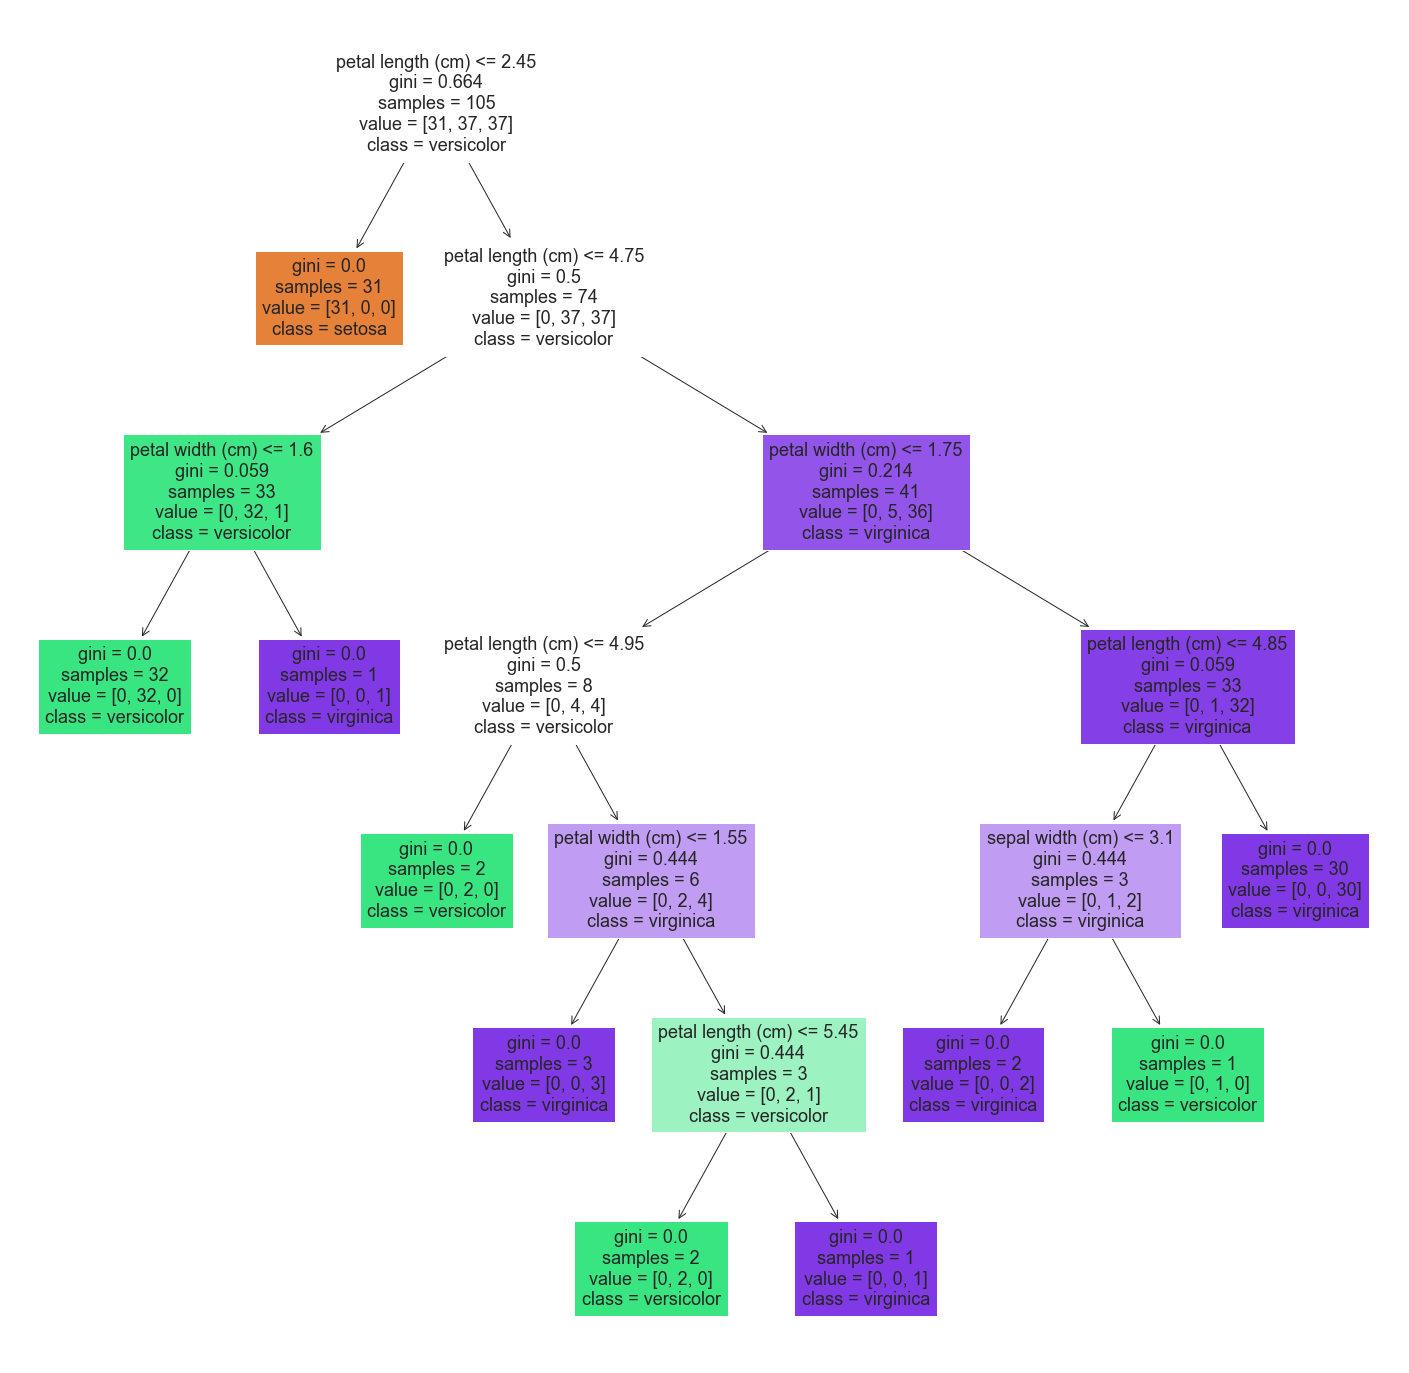

In [121]:
fig = plt.figure(figsize=(25,25))
plt.title('Visualization of Decision Tree for Iris Dataset with criterion set to Gini Impurity')
_ = tree.plot_tree(dtree_model_gini, 
                   feature_names=X_train.columns.to_list(),  
                   class_names=iris.target_names,
                   filled=True)


### Training the Decision Trees with entropy 

In [122]:
depths = [1,2,3,4,5,None]
for depth in depths:
    dtree_model_gini = DecisionTreeClassifier(max_depth=depth, random_state=42, criterion='entropy')
    dtree_model_gini.fit(X_train,y_train)
    predictions = dtree_model_gini.predict(X_test)
    print(f'--------At Depth: {depth}--------')
    print(classification_report(y_test, predictions))

--------At Depth: 1--------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.50      1.00      0.67        13
           2       0.00      0.00      0.00        13

    accuracy                           0.71        45
   macro avg       0.50      0.67      0.56        45
weighted avg       0.57      0.71      0.61        45

--------At Depth: 2--------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

--------At Depth: 3--------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96  

C:\Users\Predator\Envs\kn_ml\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Predator\Envs\kn_ml\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Predator\Envs\kn_ml\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Here, training with entropy as the function to measure the quality of the split we get the best accuracy at depth 4.

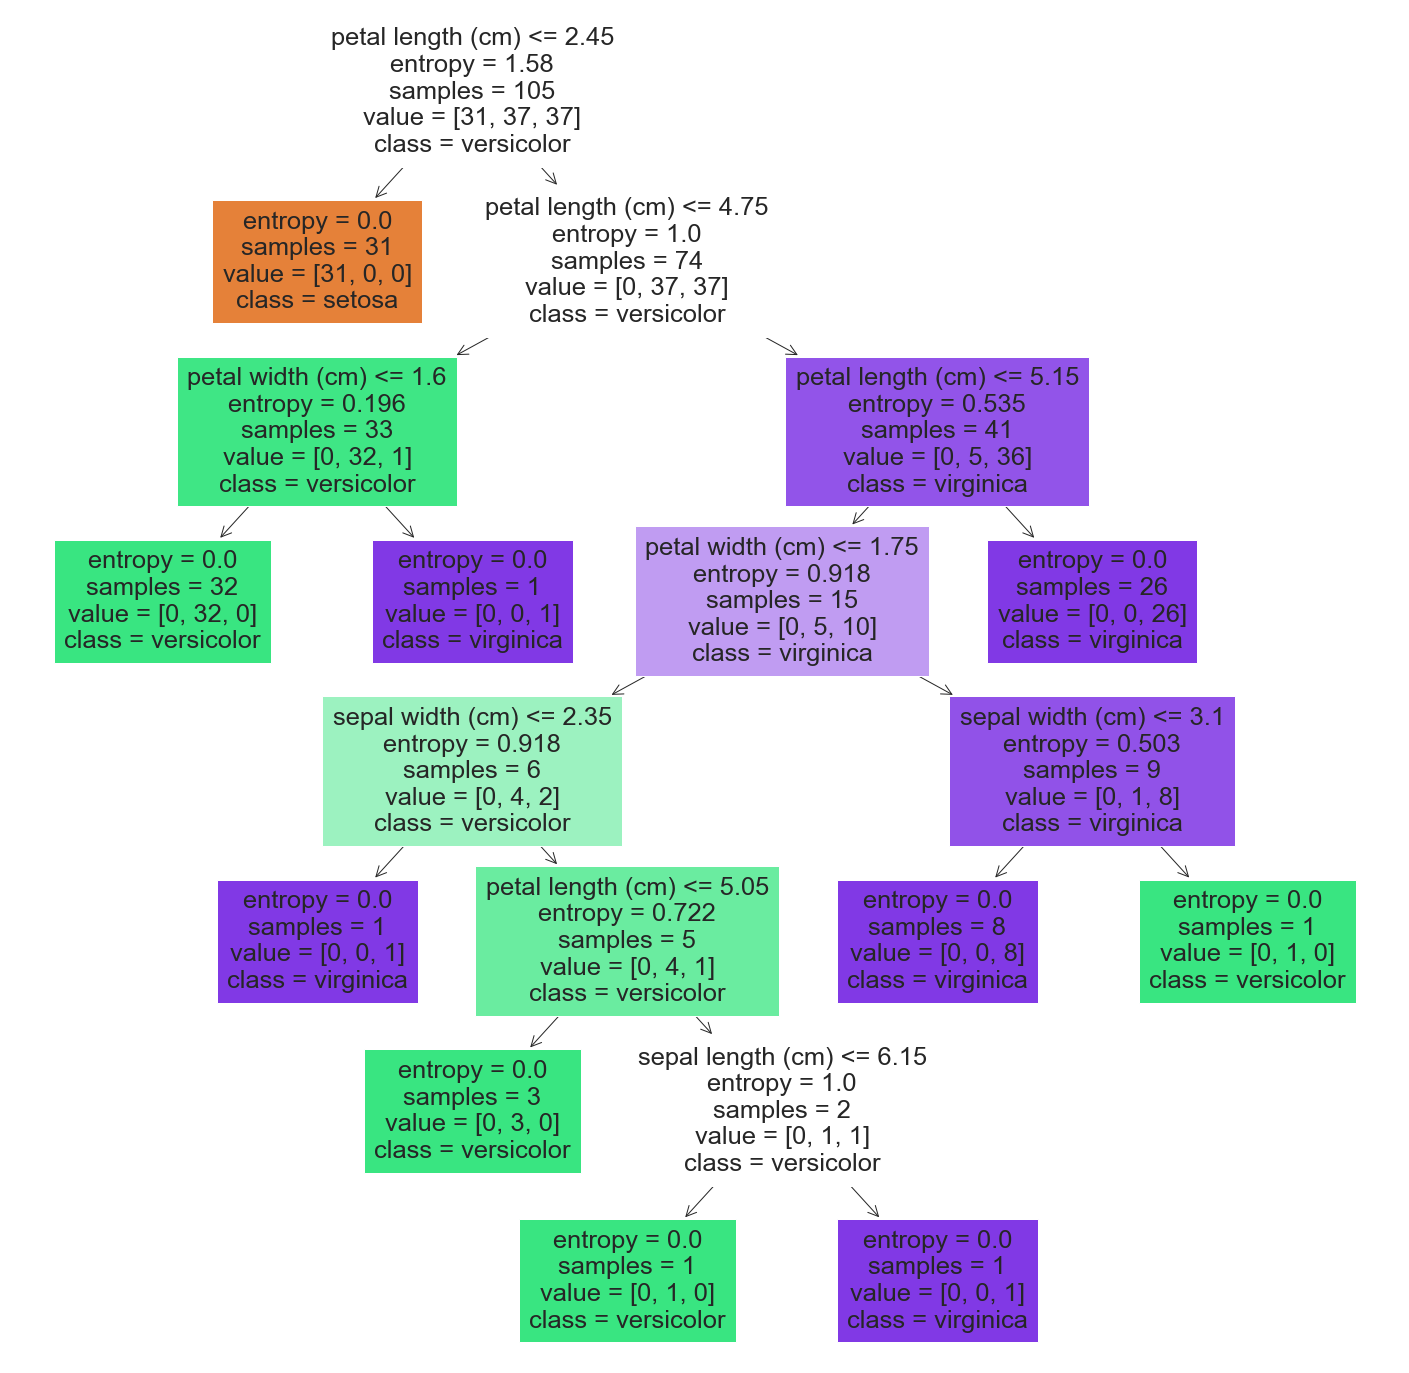

In [123]:
fig = plt.figure(figsize=(25,25))
plt.title('Visualization of Decision Tree for Iris Dataset with criterion set to Entropy')
_ = tree.plot_tree(dtree_model_gini, 
                   feature_names=X_train.columns.to_list(),  
                   class_names=iris.target_names,
                   filled=True)


### Training the model at max_depth = 3 and using gini index as the criterion to make predictions

In [124]:
dtree = DecisionTreeClassifier(max_depth=3, random_state = 42)
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [125]:
predictions

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [128]:
from sklearn.metrics import accuracy_score

print(f'Accuracy: {accuracy_score(y_test, predictions)}')

Accuracy: 1.0


In [129]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [132]:
dtree_feature_imp = dtree.feature_importances_
dtree_feature_imp

array([0.        , 0.        , 0.92510833, 0.07489167])

In [139]:
feature_names = list(df.columns[:-1])
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [140]:
feature_imp_df = pd.DataFrame([dtree_feature_imp], columns = feature_names)

In [141]:
feature_imp_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.0,0.0,0.925108,0.074892


Here, from the above table we can see that the petal length is the most important feature followed by petal width. 
<b> Note: The highter the value for feature imporatnce, the more important is the feature. </b>

#### Therefore training the model with only two features petal length (cm) and petal width (cm)

In [153]:
reduced_df = df.iloc[:,2:]
reduced_X = reduced_df.drop(['species'],axis=1)
reduced_y = reduced_df['species']

In [154]:
reduced_X.shape, reduced_y.shape

((150, 2), (150,))

In [155]:
reduced_X_train, reduced_X_test, reduced_y_train,reduced_y_test = train_test_split(
    reduced_X, reduced_y, test_size=0.3, random_state=42
)

In [156]:
reduced_X_train.shape, reduced_y_train.shape

((105, 2), (105,))

In [157]:
dtree2 = DecisionTreeClassifier(max_depth=3, random_state = 42)

In [158]:
dtree2.fit(reduced_X_train,reduced_y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [162]:
predictions2 = dtree2.predict(reduced_X_test)

In [163]:
print(f'Accuracy: {accuracy_score(reduced_y_test, predictions2)}')

Accuracy: 1.0


In [164]:
print(f'{classification_report(reduced_y_test, predictions2)}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Upon training the model on only two features i.e petal length and petal width out of all the 4 features, our decision tree model still performed with the same accuracy.

### Using GridSearch and cross validation to find the best-parameters

In [165]:
from sklearn.model_selection import GridSearchCV

In [166]:
from sklearn.pipeline import Pipeline

In [171]:
steps = [
    ('dtree', DecisionTreeClassifier())
]
pipeline = Pipeline(steps)
parameters = {
    'dtree__criterion': ['gini','entropy'],
    'dtree__splitter': ['best','random'],
    'dtree__max_features': ['auto','log2',None],
    'dtree__max_depth': np.arange(1,26)
}
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)
cv = GridSearchCV(pipeline, param_grid=parameters,cv=5)
cv.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('dtree', DecisionTreeClassifier())]),
             param_grid={'dtree__criterion': ['gini', 'entropy'],
                         'dtree__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25]),
                         'dtree__max_features': ['auto', 'log2', None],
                         'dtree__splitter': ['best', 'random']})

In [172]:
cv.best_score_

0.9619047619047618

In [173]:
cv.best_estimator_

Pipeline(steps=[('dtree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=16,
                                        splitter='random'))])

In [174]:
cv.best_params_

{'dtree__criterion': 'entropy',
 'dtree__max_depth': 16,
 'dtree__max_features': None,
 'dtree__splitter': 'random'}

In [175]:
predictions = cv.predict(X_test)
predictions

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [178]:
print(f'Accuracy: {accuracy_score(y_test, predictions)}')

Accuracy: 1.0


In [179]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

